# Exploring the curse of dimensionality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Function to generate data

In [2]:
def sample(N=4,d=2):
    """returns a numpy array of N observations of d features (dimensions) with shape (N,p) sampled from the hypercube [0,1] in each dimesion"""
    X = np.random.uniform(0.,1., (N,d))
    return X

### Helper function to filter distances by removing the diagonal (where distances = 0)

In [3]:
def filter_distances(distances_array):
    #reshape only the upper triangle of distances
    dist_filtered = np.ma.masked_equal(distances_array,0)

    return dist_filtered


### UNUSED Helper function to convert upper triangle pairwise distance matrix to vector

In [4]:
# def vectorize_distances(distances_array):
#     #reshape only the upper triangle of distances
#     upperTdis = np.triu(distances_array,0)
#     dist_vec = np.reshape(upperTdis,-1)
#     #remove zeros
#     dist_vec_filtered = np.ma.masked_equal(dist_vec,0)
#     return dist_vec_filtered
 

## Helper function to determine closest distances in data (given an observationCount and dimensionality)

In [5]:
def dim_closest_dists(obsCount=1000,dim_count=1):
    """Generates a dataset and returns the set of nearest neighbor distances for each points in the dataset """
    X=sample(N=obsCount,d=dim_count)
    #collect pariwise distances
    pair_dists = euclidean_distances(X,X)
    #Determine euclidean distances to closest neighbor
    closest_neighbor_dists = np.min(filter_distances(pair_dists),axis=0)
    closest_neighbor_dists = closest_neighbor_dists[~closest_neighbor_dists.mask].data  #remove the mask and keep the remaining data as vector
    return closest_neighbor_dists


### Helper function to display overalpping histograms of the distances per dimensionality

In [6]:
def distance_histograms(dims_list, distances_array):
    """ plots a multi-histogram of the minimum distances """
    
    #determine the range for the bins
    maxval = np.max(distances_array)
    bincount = 150
    bins = np.linspace(0, maxval, bincount)
    plt.figure(figsize=(16,9))
    #plt.hist(distances_array,bins,alpha=0.5)
    for idx in range(distances_array.shape[0]):
        plt.hist(distances_array[idx,:],bins,alpha=0.5, label = dims_list[idx])
    
    #plt.hist(distances_vec,bins=50)
    plt.legend(loc='upper right')
    plt.title("Closest Neighbor Distances per dimensionality ")
    plt.xlabel("Euclidean Distance")
    plt.ylabel("Count")
    plt.show()
    


# Active Code Section

## STUDENT CODE

Select the list of dims to evaluate
Select the number of observations to generate

Example:
```
dimrange = [2,3,4]
obsCount = 1000
```


In [7]:
dimrange = [2,3,4,5,10,20]
obsCount = 1000

### Compute the nearest neighbor distances

In [8]:
dim_mindists = np.zeros((len(dimrange),obsCount))  #placeholder for nearest neighbor distances between points
for idx,d in enumerate(dimrange):
    closest_neighbor_dists = dim_closest_dists(obsCount,d)
    dim_mindists[idx,:] = closest_neighbor_dists
    #print(np.min(closest_neighbor_dists))
    #print(np.max(closest_neighbor_dists))

### Display a histogram of the nearest neighbor distances as a function of dimension

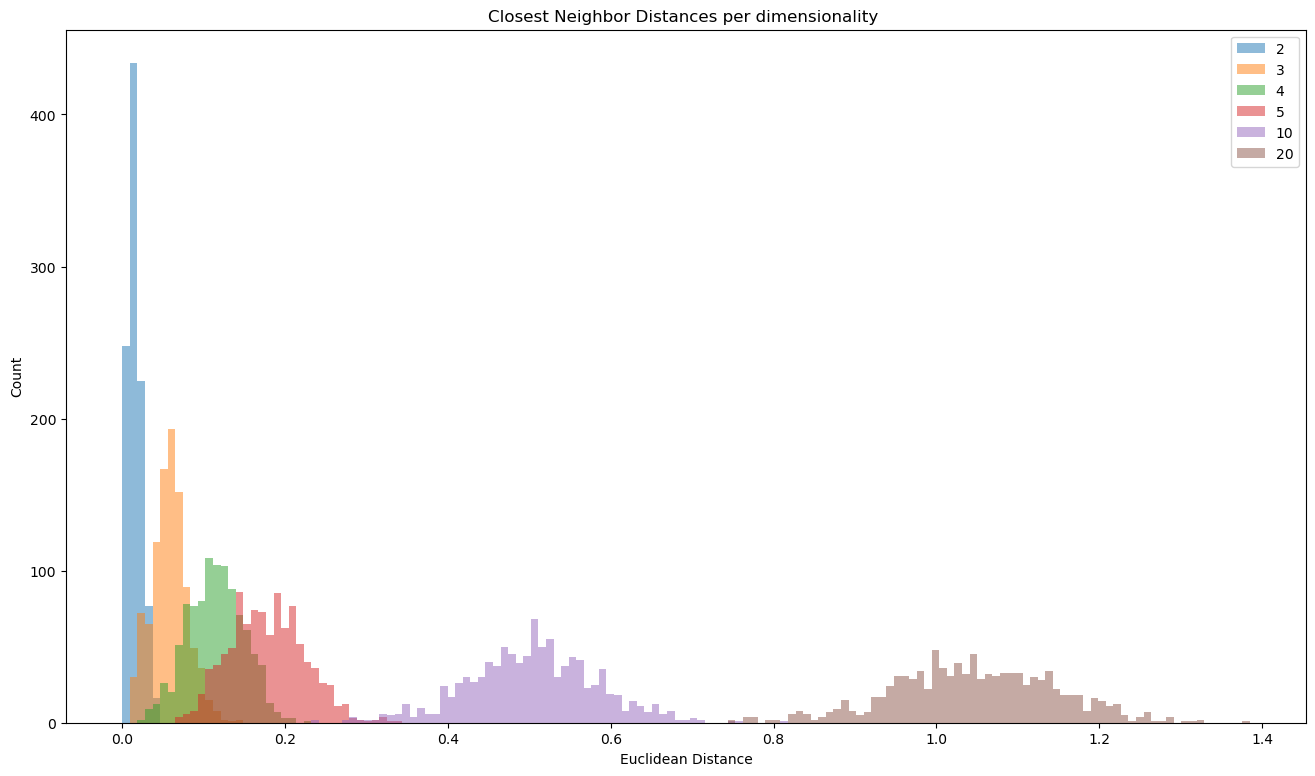

In [9]:
                        
distance_histograms(dimrange,dim_mindists)

Given a fixed number of datapoints, the higher the dimensionality, the further the closest neighbor distance